<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 3.3 - Unconstrained Optimization

### Thomas Derr

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

## 3.3.1 Necessary and Sufficient Conditions of Local Minimizers

We are interested unconstrained operation, essentially we want to find

$\min \limits_{x\in \mathbb{R}^d}f(x)$

For a given $f: \mathbb{R}^d \rightarrow \mathbb{R}$

We want to find a global minimizer, i.e. we we wish to find some $x^* \in \mathbb{R}^d$ such that

$f(x) \geq f(x^*), \forall x\in \mathbb{R}^d$

In $f: \mathbb{R}^2 \rightarrow \mathbb{R}$, this can be thought of as finding the point $(x,y)$, at the location of the lowest $z$ value on the graph

A local minimizer of $f$ over $\mathbb{R}^d$ is any $x^*$ such that there exists $\delta > 0$ that satisfies the following

$f(x) \geq f(x^*), \forall x \in B_\delta(x^*)\backslash \{x^*\}$

This esssentally means that there exists some non zero number $\delta$ such that no point $x$ within $\delta$ distance of $x^*$ has $f(x)$ lower than $f(x^*)$

A function may have many local minimizers producing varying values of $f(x^*)$, but only one value $f(x^*)$ exists across the function (although there may be multiple $x^*$ that produce it)



We can find global and local minimizers using the gradiant and Hessian of $f$, in order to dot this, we must define descent direction.

A vector $v$ is a descent direction for $f$ at $x_0$ if there is a $\alpha^* > 0$ such that

$f(x_0 + \alpha v) <f(x_0), \forall \alpha \in (0, \alpha^*)$

Or if $f$ is continuously differentiable, then the directional derivative can be used to find the descent direction

$\frac{\partial f(x_0)}{\partial v} = \nabla f(x_0)^Tv<0$

i.e. If the directional derivative of $f$ at $x_0$ in the direction of $v$ is negative, it is a descent direction for $f$

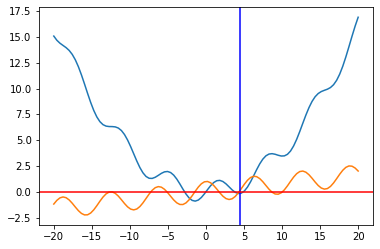

In [ ]:
x = np.linspace(-20, 20, 100)

def f(x):
    return np.sin(x) + 0.04 * x ** 2


def df(x):
    return np.cos(x) + 0.08 * x


a = -1.5
b = 4.5

fig, ax = plt.subplots()

ax.plot(x, f(x))
ax.plot(x, df(x))
ax.axvline(x=b, ymin=0.0, ymax=1.0, color='b')
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='r')

plt.show()

The value of $x$ at the blue line is a local minimizer, and the orange line shows the derivative of $f$ with respect to $x$, so the places where the orange line s below the red line is where the descent direction is in the positive direction of $x$ and in places where the orange is above the red the descent direction is where the descent direction is in the negative direction. The places where the orange and red intersect are local maxima and minima.


## 3.3.2 Convexity and Global Minimizers

A real-valued function is convex if a line segment can be drawn between any two points on the graph and the entirety of the graph between the points lies below the line segment. For convex functions, local minimizers are global minimizers

A set $D \subseteq \mathbb{R}^d$ is convex if for all $x,y \in D$ and all $\alpha \in [0,1]$

$(1-\alpha)x+\alpha y \in D$

A fuction $f:\mathbb{R}^d \rightarrow \mathbb{R}$ is convex if for all $x,y \in D$ and all $\alpha \in [0,1]$

$f((1-\alpha)x + \alpha y) \leq (1-\alpha) f(x) + \alpha f(y)$


For a convex function, the following holds true for a minimizer $x_0$

$\nabla f(x_0)=0$


In fact, if $\nabla f(x_0)=0$, then we also know htat $x_0$ is a global minimizer

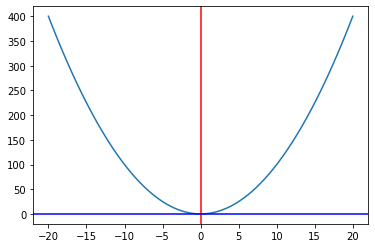

In [ ]:
x = np.linspace(-20, 20, 100)

def f(x):
    return x ** 2

fig, ax = plt.subplots()
ax.plot(x, f(x))

ax.axvline(x=0, ymin=0.0, ymax=1.0, color='r')
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='b')

plt.show()

As can be seen, because $f$ is convex, there is only one local minimizer, thus making it the global minimizer.

## 3.3.3 Gradient Descent

Gradient descent is an iterative algorithm to find a local minimum. Because it is computationally inefficient to try to evaluate every point on the function, and trying to evaluate each stationary point can be unreliable, gradient descent works better in the general case than these more naive methods.

We can run the algorithm as follows, given some x^0, and step size $\alpha_k >0$

$x^{k+1} = x^k - \alpha_k \nabla f(x^k), k = 0,1,2,...$

The idea here is that we repeatedly move from some starting point in the steepest direction by $\alpha_k$

If $f$ is twice continuously differentiable,

$\alpha_k = \arg \min _{\alpha > 0} f(x^k=\alpha \nabla f(x^k))$

If we continuously do this with small enough $\alpha_k$, we will eventually reach a local minima

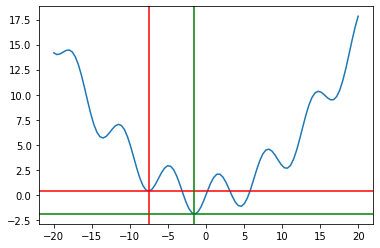

In [ ]:
x = np.linspace(-20, 20, 100)

def f(x):
    return 2* np.sin(x) + 0.04 * x ** 2

def df(x):
    return 2 * np.cos(x) + 0.08 * x

x0 = x[25]
minfx = (minimize(f, x0, method='nelder-mead'))['x'][0]


min2fx = minimize(f, x0, method="CG")['x'][0]


fig, ax = plt.subplots()
ax.plot(x, y)

ax.axvline(x=minfx, ymin=0.0, ymax=1.0, color='r')
ax.axhline(y=f(minfx), xmin=0.0, xmax=1.0, color='r')

ax.axvline(x=min2fx, ymin=0.0, ymax=1.0, color='g')
ax.axhline(y=f(min2fx), xmin=0.0, xmax=1.0, color='g')

plt.show()

As can be seen, the first try (shown in red) of the gradient descent method found a local minimizer, and by changing the method (shown in green), it was also able to find the global minimizer.